/tmp/ipython-input-2177967732.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288584  24.757338  23.848709  24.746230  212818400
2015-01-05  23.604330  24.137511  23.417718  24.057533  257142000
2015-01-06  23.606548  23.866473  23.244429  23.668752  263188400
2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
2015-01-08  24.857306  24.915067  24.148620  24.266365  237458000
Mean Squared Error: 7.73


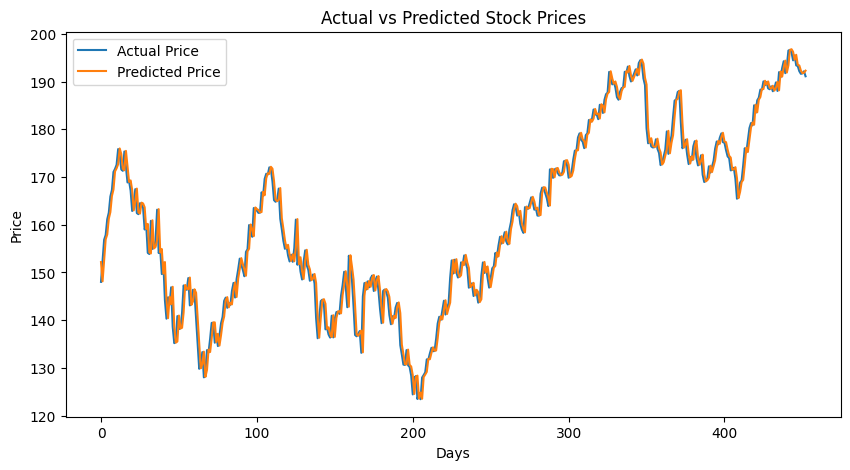

Predicted Next Day Price: $191.26


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf


stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start="2015-01-01", end="2023-12-31")


print(df.head())
df['Previous_Close'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Previous_Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plotting
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()
latest_price = df['Close'].iloc[-1]
predicted_next = model.predict(np.array(latest_price.item()).reshape(-1, 1))
print(f"Predicted Next Day Price: ${predicted_next[0].item():.2f}")

In [ ]:
def airline_chatbot(user_input):
    """A simple rule-based chatbot for airline queries."""

    user_input = user_input.lower()

    if "hello" in user_input or "hi" in user_input:
        return "Hello! Welcome to the airline support. How can I help you with your flight today?"
    elif "flight status" in user_input:
        return "Please provide your flight number or destination to check the flight status."
    elif "booking" in user_input or "book a flight" in user_input:
        return "You can book a flight through our website or mobile app. Do you need help navigating there?"
    elif "baggage" in user_input or "luggage" in user_input:
        return "Information about baggage allowance and fees can be found on our website. What specific question do you have about baggage?"
    elif "check in" in user_input:
        return "You can check in online through our website or app starting 24 hours before your flight."
    elif "cancel flight" in user_input or "change flight" in user_input:
        return "To cancel or change your flight, please go to the 'Manage Booking' section on our website and enter your booking reference."
    elif "contact" in user_input or "phone number" in user_input:
        return "You can find our contact information on the 'Contact Us' page of our website."
    elif "bye" in user_input or "goodbye" in user_input:
        return "Thank you for contacting the airline support. Have a safe journey!"
    else:
        return "I'm sorry, I don't understand your request. Could you please rephrase your question regarding airline services?"

# Interactive chat
print("Hello! Welcome to the airline support. How can I help you with your flight today?")
while True:
    user_input = input("You: ")
    response = airline_chatbot(user_input)
    print("Chatbot:", response)
    if "bye" in user_input.lower() or "goodbye" in user_input.lower():
        break

Hello! Welcome to the airline support. How can I help you with your flight today?
You: hello
Chatbot: Hello! Welcome to the airline support. How can I help you with your flight today?
You: flight status
Chatbot: Please provide your flight number or destination to check the flight status.
You: booking
Chatbot: You can book a flight through our website or mobile app. Do you need help navigating there?
You: baggage
Chatbot: Information about baggage allowance and fees can be found on our website. What specific question do you have about baggage?
You: check in
Chatbot: You can check in online through our website or app starting 24 hours before your flight.
You: cancel flight
Chatbot: To cancel or change your flight, please go to the 'Manage Booking' section on our website and enter your booking reference.
You: contact
Chatbot: You can find our contact information on the 'Contact Us' page of our website.
You: bye
Chatbot: Thank you for contacting the airline support. Have a safe journey!
